# Machine Learning Engineer Nanodegree
## Capstone Proposal
JinXian Dong  
March 20th, 2018



### 项目背景
&emsp;&emsp;猫狗识别，源于kaggle竞赛，属于计算机视觉的研究领域。猫狗识别项目，涉及到图片分类及目标识别到内容。2012年开始使用扩展了深度的CNN在ImageNet竞赛中获得极佳表现，分类能力和识别能力均大幅度增加，并取得突破性进展<sup>[1]</sup>。猫狗识别项目中，涉及到的分类问题和目标识别问题基于CNN完全可以得到解决。  
&emsp;&emsp;我个人选择这个项目，也是基于上述，图像分别、目标识别是机器学习中的经典问题。出于学习的考虑，自然想一探究竟。

### 问题描述
&emsp;&emsp;我将要解决的问题是，对于未知的图片输入，判断图片中是否有猫狗，并区分出具体是猫还是狗。这个问题，我所知道的，至少有两种解决办法：一是传统的监督学习，如支持向量机等，二是常用的深度学习，如卷积神经网络。我将通过已有的数据集，训练模型，并通过验证集测试识别结果。这个地方给出具体的识别概率，因此这个问题**可衡量**，**可量化**。然后我们通过现实生活中的未知猫狗图片，进行输入识别，模型对于相同的输入和会输出特定的识别率，**可重现**。

### 输入数据
&emsp;&emsp;数据集来源于Kaggle，原数据集有12500只猫和12500只狗。图片的命令都是type.num.jpg，图片的大小有不同的尺寸，图片都是彩色的，包含RGB三个通道数据。另外，除了25000张已作出标记的训练数据，还有12500张未作标记的数据集。
 * 数据集中的猫狗图片，我进行了浏览观察，发现几乎涵盖了生活中的室内、户外等各个场景，丰富而复杂；
 * 关于图片大小及尺寸，图片最大的91k，而最小的只有1.1k，图片尺寸最大的有`1023*768`，而最小的只有`60*39`。可以看出差距较大；
 * 关于训练集数据的使用，我会分出八到九成的数据用于训练模型，剩下的一到二成数据验证模型训练的好坏，便于参数调节；
 * 对于图片的处理，由于裁剪方式可能造成关键信息的丢失，我们采用等比缩放的方式。  

以下代码中，我们随机采集了一些数据集中的图片展示示例。由于排版问题，缩放效果和原始图片对差距并不能在文章中直接展示，我们仅呈现出图片对尺寸说明。

../../temp/competitions/dogs-vs-cats-redux-kernels-edition/train/cat.314.jpg
../../temp/competitions/dogs-vs-cats-redux-kernels-edition/train/cat.8776.jpg
../../temp/competitions/dogs-vs-cats-redux-kernels-edition/train/dog.5303.jpg
../../temp/competitions/dogs-vs-cats-redux-kernels-edition/train/dog.5303.jpg


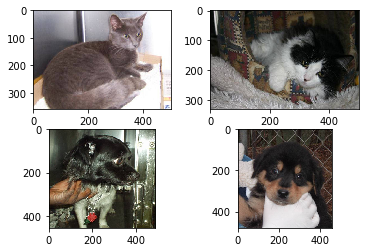

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from PIL import Image
#%matplotlib inline

# 切换到data目录
data_dir = "../../temp/competitions/dogs-vs-cats-redux-kernels-edition"

# 随机获取数据集中图片并展示
cat_image_1 = "%s/train/cat.%s.jpg" % (data_dir,random.randint(1,12499))
cat_image_2 = "%s/train/cat.%s.jpg" % (data_dir,random.randint(1,12499))
dog_image_1 = "%s/train/dog.%s.jpg" % (data_dir,random.randint(1,12499))
dog_image_2 = "%s/train/dog.%s.jpg" % (data_dir,random.randint(1,12499))
print cat_image_1
print cat_image_2
print dog_image_2
print dog_image_2

# 展示
plt.subplot(2, 2, 1)
plt.imshow(mpimg.imread(cat_image_1))
plt.subplot(2, 2, 2)
plt.imshow(mpimg.imread(cat_image_2))
plt.subplot(2, 2, 3)
plt.imshow(mpimg.imread(dog_image_1))
plt.subplot(2, 2, 4)
plt.imshow(mpimg.imread(dog_image_2))
plt.show()

### 解决办法
&emsp;&emsp;首先传统的机器学习方法，对于此类问题，也有一定的处理能力。但是业界公认的解决方案，是卷积神经网络CNN（2012后，对于此类问题解决能力的提升，均是采用了更加优化设计的CNN模型）。因此我们采用CNN，作为本项目的解决方案。  
&emsp;&emsp;CNN的基本结构由输入层、卷积层、取样层、全连接层及输出层构成。卷积层和取样层一般会取若干个，采用卷积层和取样层交替设置，即一个卷 积层连接一个取样层，取样层后再连接一个卷积层，依此类推。由于卷积层中输出特征面的每个神经元与其输入进行局部连接，并通过对应的连接权值与局部输入进行加权求和再加上偏置值，得到该神经元输入值，该过程等同于卷积过程，卷积神经网络也由此而得名<sup>[2]</sup>。

### 基准模型
&emsp;&emsp;我们需要获得kaggle前10%的排名，截止目前有4426个提交的成绩，其中排行榜上1314名，前百分之十，则我们需要得分小于**0.06127**。

### 评估指标
&emsp;&emsp;直接采用kaggle官方提供的公式，其最终**得分越低，效果越好**，如下：
$$ \textrm{LogLoss} = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right], $$
- 说明:  
 * $n$是测试集的图片数量
 * $\hat{y}_i$是猜测图片是狗的概率
 * $y_i$为1的时候图片为狗，0的时候图片为猫
 * $log()$是自然对数

### 设计大纲
&emsp;&emsp;本项目的遵循传统CNN模型训练和构建的一般步骤：
 - **数据预处理**  
&emsp;&emsp;由于图片尺寸差距明显，我们会对图片进行resize（大概是200*200对大小），对图片对大小进行统一。至于数据对切分，我觉得在图片读入内存后，在程序中处理即可。没有必要调整文件组织。
 - **模型搭建**  
&emsp;&emsp;根据上个项目对经验，除开输入层和输出层外。我将采用两个卷积池化层，一个展开层和一个全连接层对方式。所不同对是，这次我将尝试使用keras，看是否能够更易于操作实现。
 - **模型训练**  
&emsp;&emsp;对训练数据的拆分使用，在训练过程中会有迭代次数对参数调节。根据训练结果，我们调节这个参数大小。有资料提到adam优化算法，不过我不是太理解。如果训练不顺利，我会考虑是否使用。
 - **模型调参**  
&emsp;&emsp;涉及到调节对参数主要有：学习率参数、样本批次容量、权重衰减值、训练次数。根据机器性能和最终对效果，这个要实施时，才能确定。
 - **模型评估**  
&emsp;&emsp;通过Logless计算得分。
 - **可视化**  
&emsp;&emsp;根据以前项目的惯例，使用matplotlib实现可视化输出。

### 参考文献
* [1] Alex Krizhevsky, IIya Sutskever, Geoffrey Hinton. Imagenet classification with deep convolutional neural  networks//Proceedings of Advances in Neural Information Processing Systems, Lake Tahoe,USA , 2012:1097-1105
* [2] Yann LeCun, Leon Bottou, Yoshua Bengio, et al. Gradient-based learning applied to document recognition. Proceedings of the IEEE, 1998, 86(11):2278-2324